In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model,metrics
from sklearn.preprocessing  import StandardScaler

# Training data &Test data 

In [110]:
df_train = pd.read_csv('./training.csv')
df_test = pd.read_csv('./test.csv')

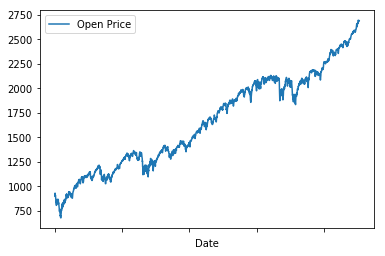

In [111]:
df_train.plot.line(x='Date', y='Open Price')

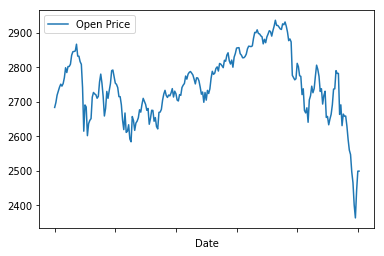

In [112]:
df_test.plot.line(x='Date', y='Open Price')

# Data preprocessing

In [113]:
up_down = []
for i in range(0,2263):
    if(df_train.iloc[i,2]-df_train.iloc[i+1,2])<0:
        up_down.append(1)
    else:
        up_down.append(0)
up_down.append(0)

df_train['increase']=up_down

ave7 = df_train["Close Price"].rolling(window=7).mean()
ave20 = df_train["Close Price"].rolling(window=20).mean()

df_train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,increase
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,1
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,0


In [114]:
test_up_down = []
for i in range(0,251):
    if(df_test.iloc[i,2]-df_test.iloc[i+1,2])<0:
        test_up_down.append(1)
    else:
        test_up_down.append(0)
test_up_down.append(0)
df_test['increase']= test_up_down

ave7 = df_test["Close Price"].rolling(window=7).mean()
ave20 = df_test["Close Price"].rolling(window=20).mean()

df_test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,increase
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,1
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,1
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,1
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,1
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,1


# Regression

In [130]:
train_X = df_train.iloc[:, 1:].reset_index(drop=True)
train_X = train_X.drop(train_X.tail(1).index)
train_X = train_X.drop(columns = ["increase"])
train_X = df_train[['Open Price','Close Price','High Price','Low Price','Volume']]
train_X.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,902.99,931.80,934.73,899.35,4048270080
1,929.17,927.45,936.63,919.53,5413910016
2,931.17,934.70,943.85,927.28,5392620032
3,927.45,906.65,927.45,902.37,4704940032
4,905.73,909.73,910.00,896.81,4991549952


In [131]:
test_X = df_test.iloc[:, 1:].reset_index(drop=True)
test_X = test_X.drop(test_X.tail(1).index)
test_X = test_X.drop(columns = ["increase"])
test_X = df_test[['Open Price','Close Price','High Price','Low Price','Volume']]
test_X.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,2683.73,2695.81,2695.89,2682.36,1846463232
1,2697.85,2713.06,2714.37,2697.77,2090595328
2,2719.31,2723.99,2729.29,2719.07,2100767744
3,2731.33,2743.15,2743.45,2727.92,1918869120
4,2742.67,2747.71,2748.51,2737.60,1894823936


In [132]:
train_Y = df_train[['increase']]
train_Y.head()

,increase
0,0
1,1
2,0
3,1
4,0


In [133]:
test_Y = df_test[['increase']]
test_Y.head()

,increase
0,1
1,1
2,1
3,1
4,1


In [134]:
sc = StandardScaler()
sc.fit(train_X)

x_train=sc.transform(train_X)
x_test=sc.transform(test_X)


C:\Users\Jerry\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jerry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Jerry\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [143]:
logreg = LogisticRegression()
logreg.fit(x_train,train_Y)

C:\Users\Jerry\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jerry\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
logreg.score(x_test, test_Y)

0.5198412698412699

# SVM

In [149]:
svm = SVC(gamma='auto')
svm.fit(x_train,train_Y)

C:\Users\Jerry\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [153]:
svm.score(x_test, test_Y)

0.5198412698412699

# Neural Network

In [159]:
mlp = MLPClassifier(solver='lbfgs', alpha=5e-2,hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x_train, train_Y)
mlp.score(x_test, test_Y)

C:\Users\Jerry\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5238095238095238

# How do I prepocess the data
- 我用第二天的收盤價減去第一天的收盤價來判斷漲幅，若是漲就設為1，如果跌就設為0。

# Which classifier reaches the highest classification accuracy in this dataset?
- NN
- 我認為原因在於NN從線性轉成非線性的過程。通過這種非線性函數，我們可以更準確分析股票價格中的數據，因為股票價格在不斷變化。無論線型函數多精準，我們都不能只使用函數來估算價格。在龐大的資料量底下，NN的演算法通常都會比較好。

# Can this result remain if the dataset is different
- 我覺得單看這些結果並沒辦法準確預測，整個股票市場有太多其他的因素影響，包含外界經濟狀況，以及公司本身的經營狀況，當處於惡劣或良好的環境時，每個公司的價格可能會一起上漲或下跌。在這種情況下，我們可以在不同的數據中獲得好的結果。而公司內部的經營狀況，可能讓公司的股票單獨上漲或下跌。當價格上漲或下跌時，其他公司可能不會一起上漲或下跌。在這種情況下，結果將有很大的不同。

# How did you improve your classifiers?
- 我覺得把每一天的漲幅都拿來計算有一點分太細了，我試過用7天，或是20天，以拉長時距的方式來看漲幅也許會更準確一點，不過結果沒有差太多